In [1]:
print("""
@Title        : Visualizing Financial Time Series
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-10 21:35:13
@Description  : 
""")


@Title        : Visualizing Financial Time Series
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-10 21:35:13
@Description  : 



In [2]:
import pandas as pd
import numpy as np

## Basic visualization of time series data

In [7]:
df = pd.read_csv('../data/MSFT_20200101_202012_31.csv', index_col='Date', parse_dates=['Date'])
df['simple_rtn'] = df['Adj Close'].pct_change()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,simple_rtn
Date,,,,,,,
2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852234,21116200,-0.012452
2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247345,20813700,0.002585
2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850067,21634100,-0.009118
2020-01-08,158.929993,160.800003,157.949997,160.089996,154.268814,27746500,0.015929
2020-01-09,161.839996,162.220001,161.029999,162.089996,156.196060,21385000,0.012493


<Axes: title={'center': 'MSFT stock in 2020'}, xlabel='Date'>

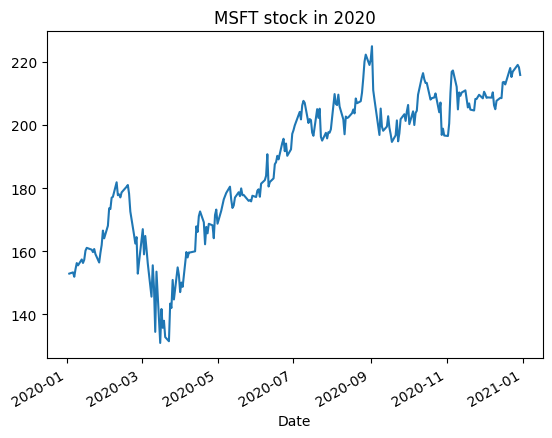

In [8]:
df['Adj Close'].plot(title='MSFT stock in 2020')

In [ ]:
df.plot.line(y='Adj Close', title='MSFT stock in 2020')
# We could have also used a more explicit notation to create the very same plot:

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

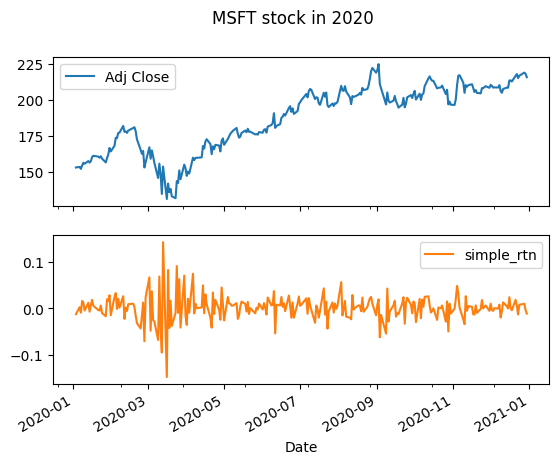

In [9]:
df[['Adj Close', 'simple_rtn']].plot(subplots=True, sharex=True, title='MSFT stock in 2020')

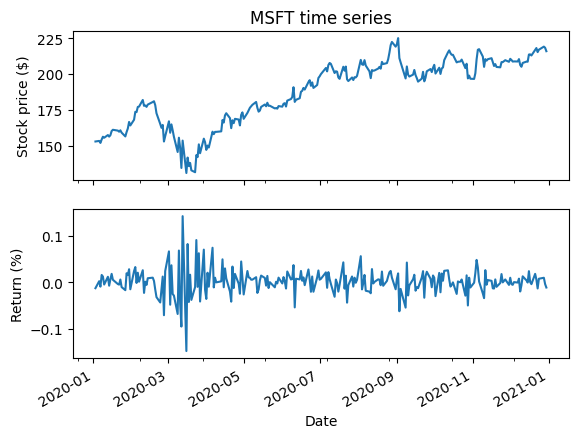

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, sharex=True)
df['Adj Close'].plot(ax=ax[0])
ax[0].set(title='MSFT time series', ylabel='Stock price ($)')
df['simple_rtn'].plot(ax=ax[1])
ax[1].set(ylabel='Return (%)')
plt.show()

In [13]:
df['Adj Close'].plot(title='MSFT stock in 2020', backend='plotly')

In [ ]:
# pd.options.plotting.backend = 'plotly'
# 可以用来全局改变绘图的后端支持，默认是 matplotlib

## Visualizing seasonal patterns

In [19]:
import seaborn as sns

In [16]:
df = pd.read_csv('../data/UNEMP_20140101_20191231.csv', index_col='Date', parse_dates=['Date'])

<Axes: title={'center': 'Unemployment rate in years 2014-2019'}, xlabel='Date'>

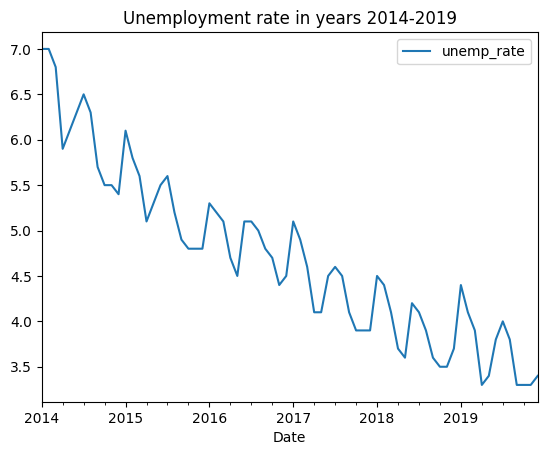

In [17]:
df.plot(title='Unemployment rate in years 2014-2019')

In [18]:
df['year'] = df.index.year
df['month'] = df.index.strftime('%b')

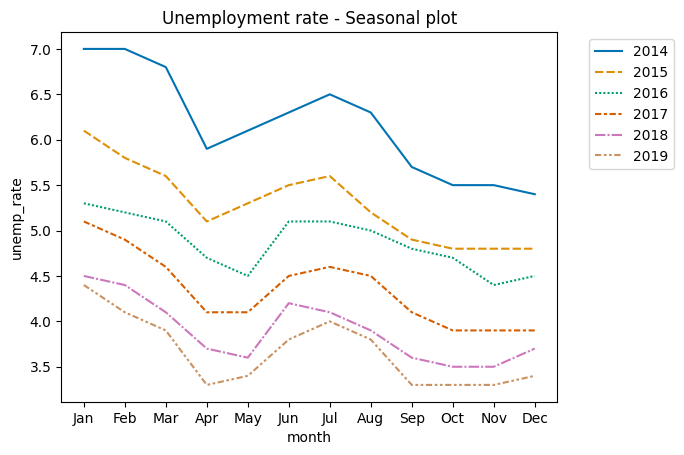

In [23]:
sns.lineplot(data=df,
             x='month',
             y='unemp_rate',
             hue='year',
             style='year',
             legend='full',
             palette='colorblind')
plt.title("Unemployment rate - Seasonal plot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [24]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import plotly.express as px

Text(0.5, 1.0, 'Unemployment rate - Month plot')

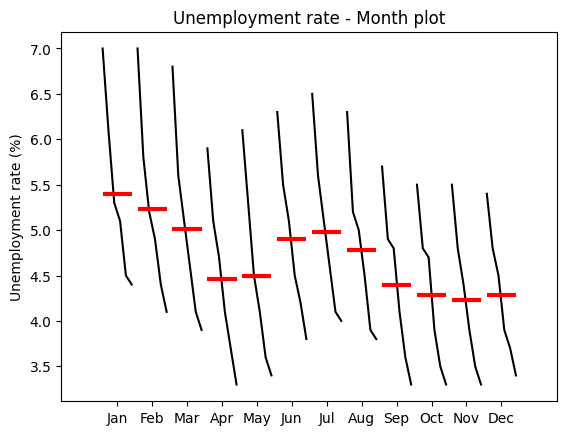

In [26]:
fig = month_plot(df['unemp_rate'], ylabel='Unemployment rate (%)')
plt.title("Unemployment rate - Month plot")

For each month, it plots a separate line showing how the unemployment rate changed over time (while not showing the time points explicitly). Additionally, the red horizontal lines show the average values in those months.

Text(0.5, 1.0, 'Unemployment rate - Quarter plot')

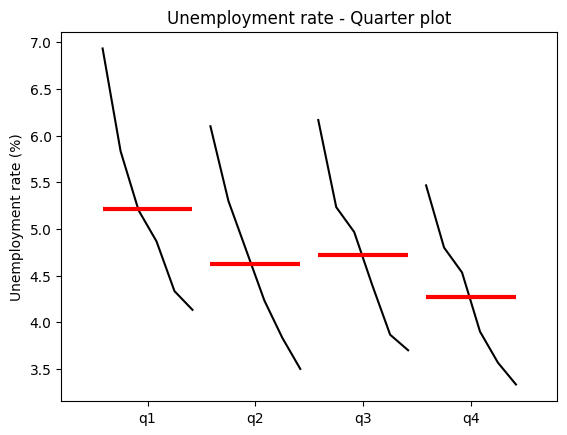

In [27]:
fig = quarter_plot(df['unemp_rate'].resample('Q').mean(),
                   ylabel='Unemployment rate (%)')
plt.title("Unemployment rate - Quarter plot")

In [34]:
fig = px.line_polar(
    df, r='unemp_rate', theta='month',
    color='year', line_close=True,
    title='Unemployment rate - Polar seasonal plot',
    width=600, height=500,
    range_r=[3, 7]
)
fig.show()

## Creating interactive visualizations

In [4]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
import pandas as pd
cf.go_offline()
# pandas_bokeh.output_notebook()

In [5]:
df = pd.read_csv('../data/MSFT_20200101_202012_31.csv', index_col='Date', parse_dates=['Date'])
df['simple_rtn'] = df['Adj Close'].pct_change()
df = df.loc[:, ['Adj Close', 'simple_rtn']].dropna()
df = df.dropna()

In [6]:
df.iplot(subplots=True, shape=(2, 1),
         shared_xaxes=True,
         title='MSFT time series')

In [7]:
df["Adj Close"].plot_bokeh(kind="line",
                           rangetool=True,
                           title="MSFT time series")

Column(id='1098', ...)

In [12]:
fig = px.line(data_frame=df,
              y='Adj Close', 
              title='MSFT time series')
fig.show()